# Overview of Data

In [4]:
import pandas as pd
import numpy as np

In [6]:
filename='agrregate'+str(0)+'.csv';
tmp= pd.read_csv(filename)
tmp.head(10)

,Time,Job ID,Task Index,Event Type
0,600026913,515042969,1,1
1,600046926,6251537638,1832,4
2,600046937,6251537638,1784,4
3,600046983,6251537638,1890,4
4,600047059,6251537638,1510,4
5,600047200,6251537638,1445,4
6,600047230,6251537638,659,4
7,600047610,6251537638,404,4
8,600047705,6251537638,1399,4
9,600047716,5285926325,0,3


In [7]:
group=tmp.groupby('Job ID')
set1=set(group.groups.keys())

In [8]:
filename='agrregate'+str(19)+'.csv';
tmp= pd.read_csv(filename)
group=tmp.groupby('Job ID')
set2=set(group.groups.keys())

In [9]:
intersect = set1 & set2
len(intersect)

684

## Daily submitted job

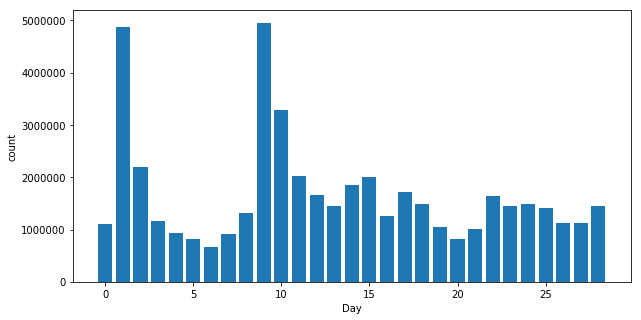

In [7]:
import matplotlib.pyplot as plt
daily_count=pd.read_csv('daily_count.csv')
#daily_count=daily_count.iloc[10:20]
plt.figure(figsize=(10,5))
plt.bar(daily_count.index.values, daily_count['Req Num'])
plt.ylabel('count')
plt.xlabel('Day')
plt.show()

## Daily fail/kill job 
The spike is caused by reschedule, claimed in the paper ([pdf](http://www.pdl.cmu.edu/PDL-FTP/CloudComputing/googletrace-socc2012.pdf))

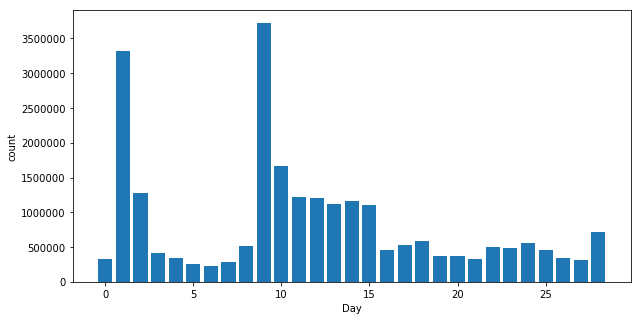

In [40]:
import matplotlib.pyplot as plt
daily_kill=pd.read_csv('daily_kill.csv')
#daily_count=daily_count.iloc[10:20]
plt.figure(figsize=(10,5))
plt.bar(daily_kill.index.values, daily_kill['Req Num'])
plt.ylabel('count')
plt.xlabel('Day')
plt.show()

## Daily new tasks 
assume all the fail/kill jobs will be rescheduled.  
However, it is not exactly same as the plot in the paper...

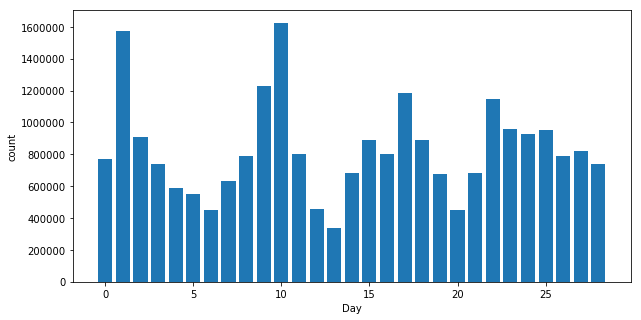

In [41]:
plt.figure(figsize=(10,5))
plt.bar(daily_kill.index.values, daily_count['Req Num']-daily_kill['Req Num'])
plt.ylabel('count')
plt.xlabel('Day')
plt.show()

## Hourly submitted job

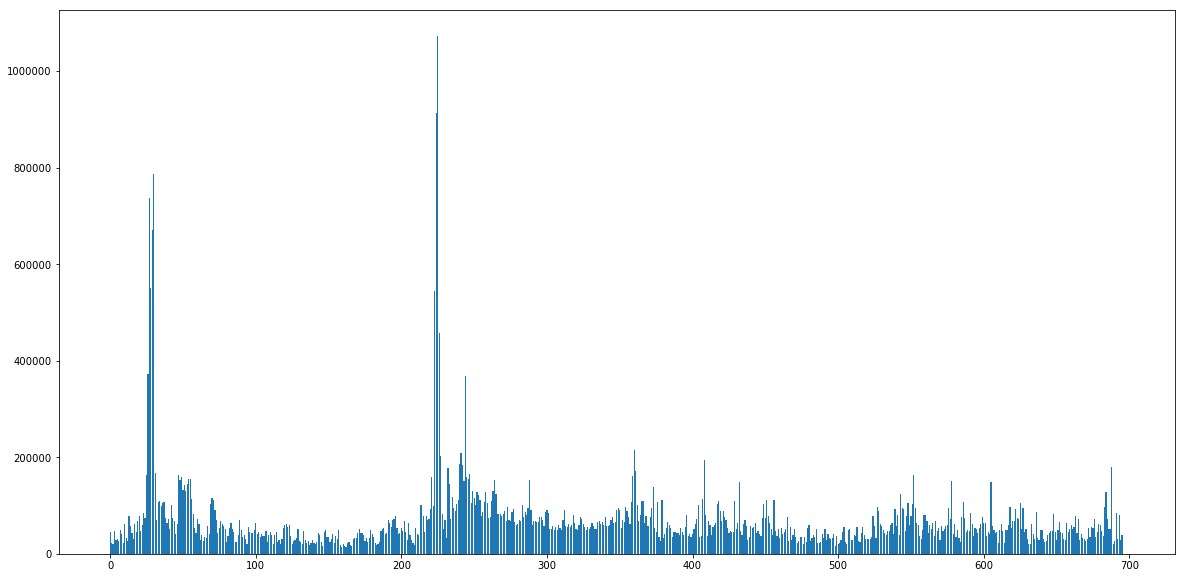

In [13]:
hourly_count=pd.read_csv('hourly_count.csv')
#hourly_count=hourly_count.iloc[15*24:18*24]
plt.figure(figsize=(20,10))
plt.bar(hourly_count.index.values, hourly_count['Req Num'])
plt.show()

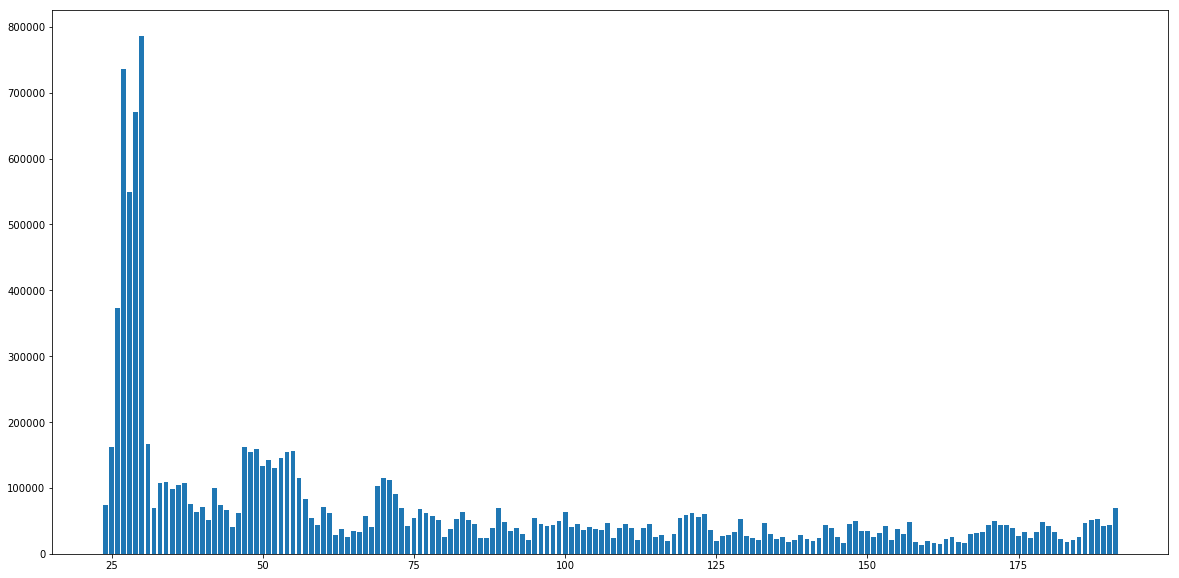

In [20]:
week1=hourly_count.iloc[24:24*8]
plt.figure(figsize=(20,10))
plt.bar(week1.index.values, week1['Req Num'])
plt.show()

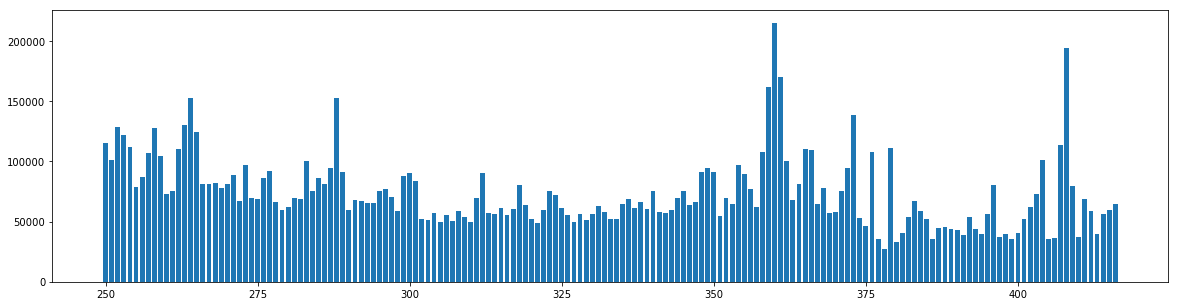

In [51]:
week2=hourly_count.iloc[24*10+10:24*17+9]
plt.figure(figsize=(20,5))
plt.bar(week2.index.values, week2['Req Num'])
plt.show()

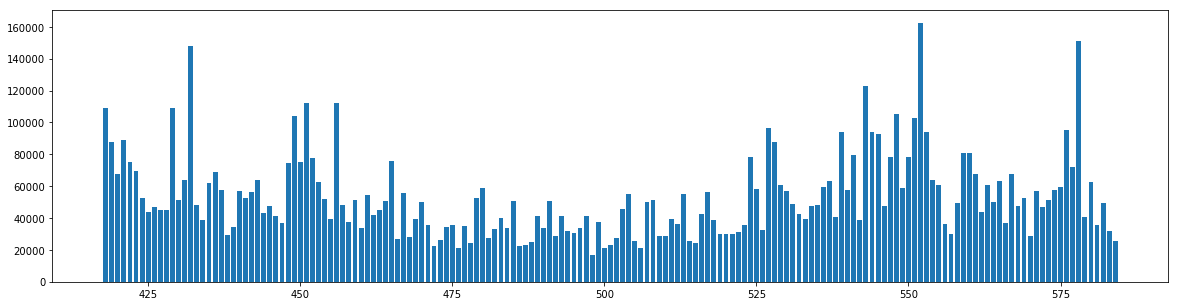

In [50]:
week3=hourly_count.iloc[24*17+10:24*24+9]
plt.figure(figsize=(20,5))
plt.bar(week3.index.values, week3['Req Num'])
plt.show()

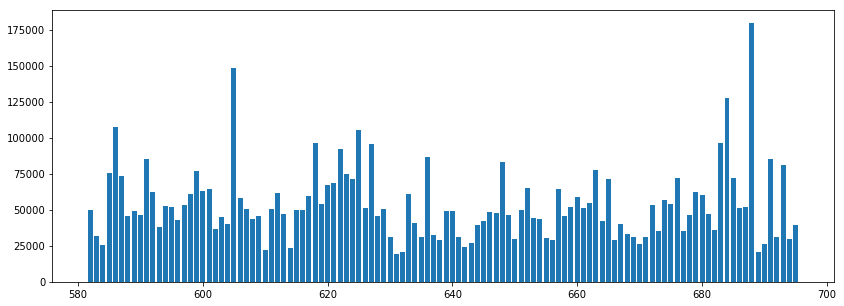

In [49]:
week4=hourly_count.iloc[24*24+6:24*29]
plt.figure(figsize=(20*5/7,5))
plt.bar(week4.index.values, week4['Req Num'])
plt.show()

## half hour data

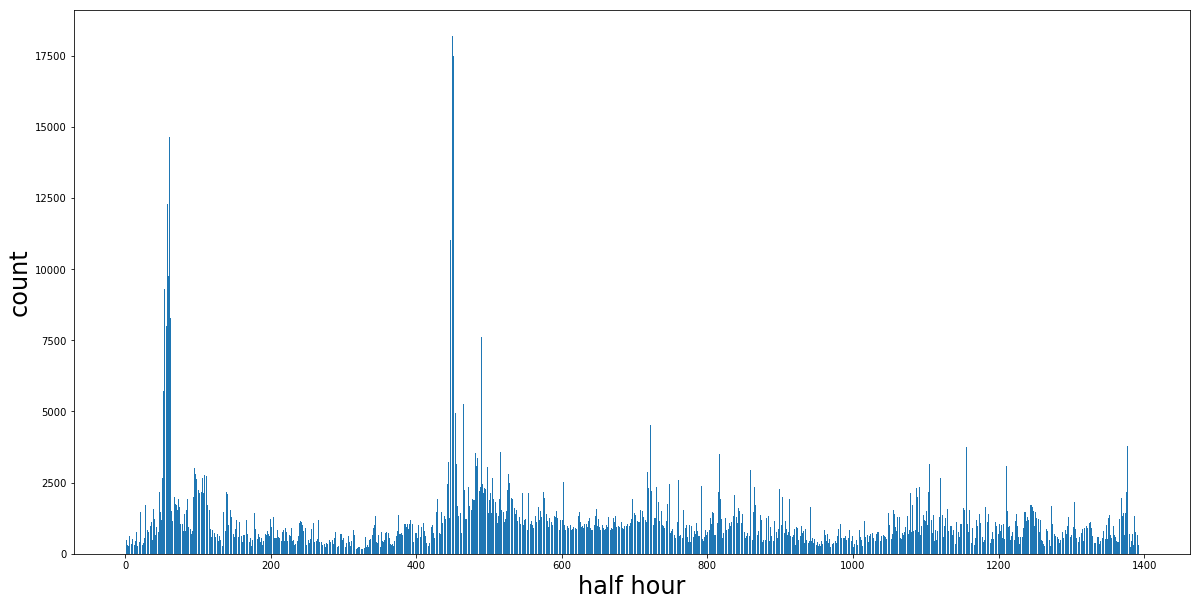

In [44]:
hfhour_count=pd.read_csv('halfhour_count2.csv')
#hourly_count=hourly_count.iloc[15*24:18*24]
plt.figure(figsize=(20,10))
plt.bar(hfhour_count.index.values, hfhour_count['Req Num']/30)
plt.ylabel('count',fontsize=24)
plt.xlabel('half hour',fontsize=24)
plt.show()

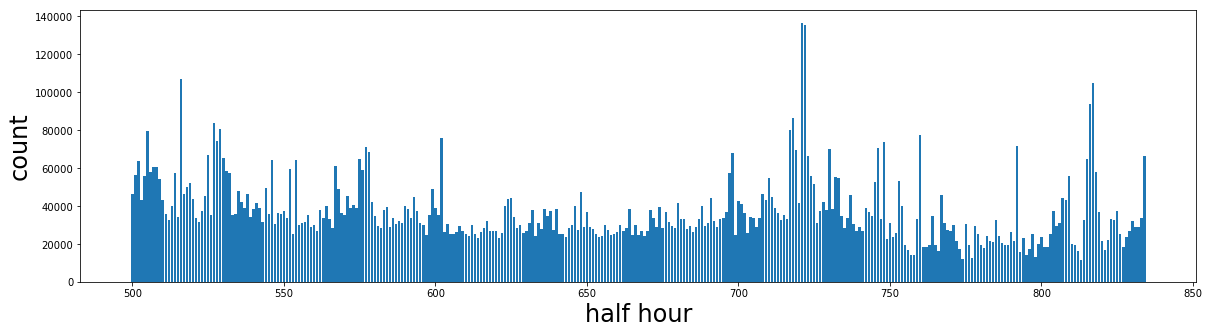

In [45]:
week2=hfhour_count.iloc[480+20:480+336+19]
plt.figure(figsize=(20,5))
plt.bar(week2.index.values, week2['Req Num'])
plt.ylabel('count',fontsize=24)
plt.xlabel('half hour',fontsize=24)
plt.show()

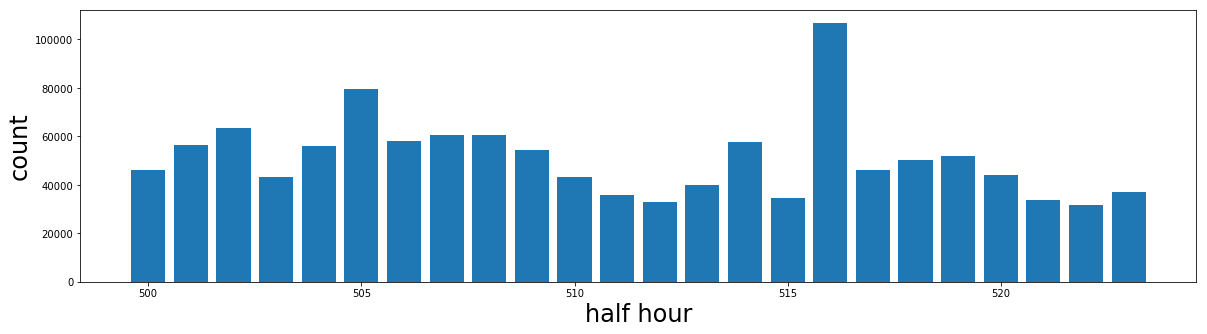

In [46]:
daytest=hfhour_count.iloc[480+20:480+20+24]
plt.figure(figsize=(20,5))
plt.bar(daytest.index.values, daytest['Req Num'])
plt.ylabel('count',fontsize=24)
plt.xlabel('half hour',fontsize=24)
plt.show()

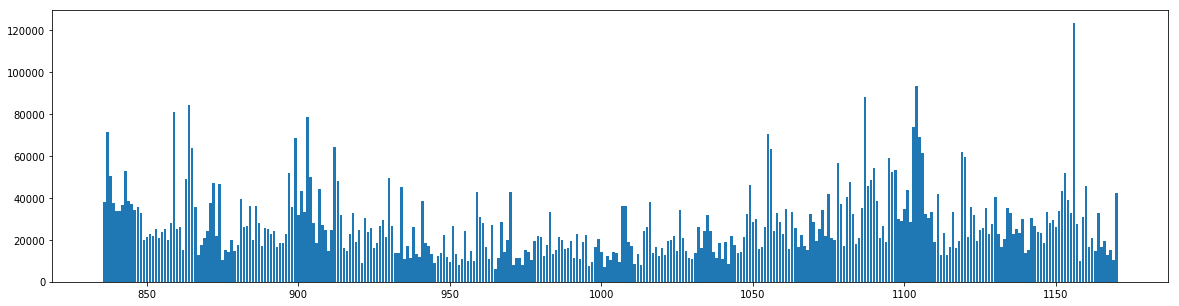

In [84]:
week3=hfhour_count.iloc[480+336+20:480+336*2+19]
plt.figure(figsize=(20,5))
plt.bar(week3.index.values, week3['Req Num'])
plt.show()

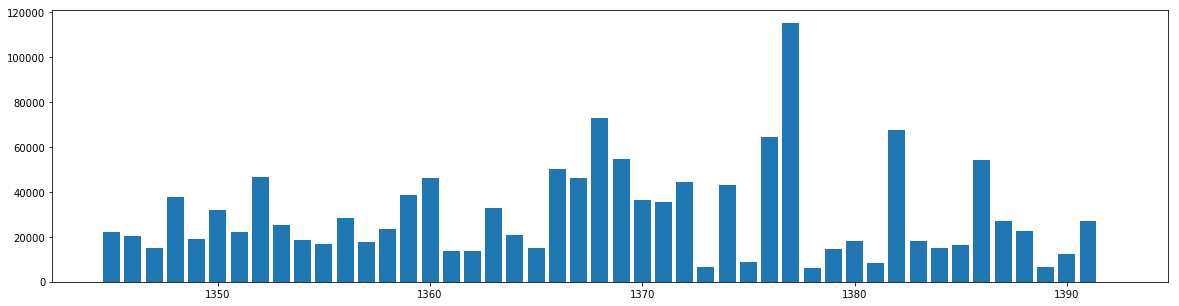

In [85]:
day29=hfhour_count.iloc[48*28+1:]
plt.figure(figsize=(20,5))
plt.bar(day29.index.values, day29['Req Num'])
plt.show()

## Task Length

In [5]:
length=pd.read_csv('table_length.csv',names = ['Start', 'End'])

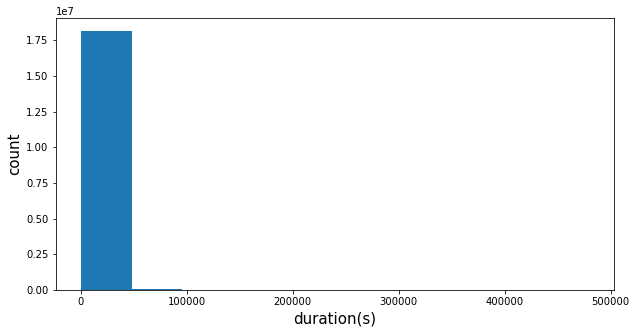

In [16]:
length['Duration']=(length['End']-length['Start'])/1e6
plt.figure(figsize=(10,5))
test=plt.hist(length['Duration'],10)

plt.xlabel('duration(s)', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

In [12]:
test


(array([  1.81535300e+07,   4.29110000e+04,   8.63300000e+03,
          1.93200000e+03,   5.16000000e+02,   2.97000000e+02,
          1.54000000e+02,   8.00000000e+00,   2.00000000e+00,
          1.50000000e+01]),
 array([  1.00000000e-06,   4.78884110e+04,   9.57768220e+04,
          1.43665233e+05,   1.91553644e+05,   2.39442055e+05,
          2.87330466e+05,   3.35218877e+05,   3.83107288e+05,
          4.30995699e+05,   4.78884110e+05]),
 <a list of 10 Patch objects>)

In [11]:
length['Duration'].mean() ## in s

1993.1486889087735

In [15]:
min(length['Duration'])*1e6 ## in us

1.0

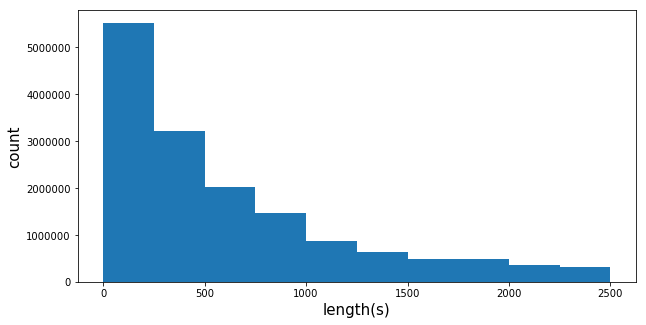

(array([ 5513261.,  3211590.,  2011257.,  1466423.,   871784.,   631628.,
          486429.,   476178.,   366918.,   317732.]),
 array([  1.00000000e-06,   2.49999804e+02,   4.99999607e+02,
          7.49999411e+02,   9.99999214e+02,   1.24999902e+03,
          1.49999882e+03,   1.74999862e+03,   1.99999843e+03,
          2.24999823e+03,   2.49999803e+03]),
 <a list of 10 Patch objects>)

In [20]:
shorter=length[length['Duration']<2500]
plt.figure(figsize=(10,5))
test=plt.hist(shorter['Duration'],10)
plt.ylabel('count', fontsize=15)
plt.xlabel('length(s)', fontsize=15)
plt.show()
test

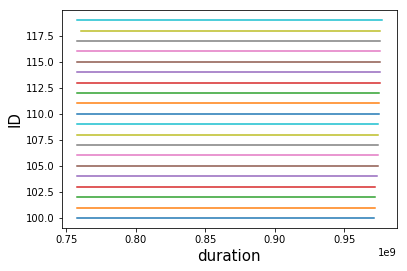

In [21]:
for i in range(100,120):
    p1=[length.iloc[i]['Start'],length.iloc[i]['End']]
    p2=[i,i]
    plt.plot(p1,p2)
plt.ylabel('ID', fontsize=15)
plt.xlabel('duration', fontsize=15)
plt.show()